# Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

# Objectives

The objective of this project is to:
- Prepare a report for a bank's loan division by analyze a borrower's risk of defaulting.
- Apply Data Preprocessing to a real-life analytical case study.

<hr>

 # Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#open_the_data">Open the data file and have a look at the general information</a></li>
        <li><a href="#data_preprocessing">Data preprocessing</a></li>
        <li><a href="#answer_questions">Answer these questions</a></li>
        <li><a href="#general_conclusion">General conclusion</a></li>
        <li><a href="#project_readiness_checklist">Project Readiness Checklist</a></li>
    </ol>
</div>
<br>
<hr>

<div id="open_the_data">
    <h2>Open the data file and have a look at the general information.</h2> 
</div>

We require the following libraries: *pandas* and *numpy* for data manipulation, *nlkt* for lemmatization, *seaborn* for visualization

In [ ]:
# import pandas and numpy for data preprocessing and manipulation
import pandas as pd
import numpy as np

# import WordNet Lemmatizer for dealing with categorical variables
import nltk
from nltk.stem import WordNetLemmatizer

# import Snowball stemmer
from nltk.stem import SnowballStemmer

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# read in the data
try:
    df = pd.read_csv('/datasets/credit_scoring_eng.csv')
except:
    df = pd.read_csv('credit_scoring_eng_eng.csv')
print('Data has been read correctly!')

In [ ]:
# use the head() method to view the first 10 rows
df.head(10)

In [456]:
# check the datatype with info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [457]:
# check the structure of our dataset
df.shape

(21525, 12)

From the initial look at the data, we can see that `days_employed` and `total_income` has some missing data or 'NaNs'. We can see that the columns with missing values is of the float datatype. From the shape of the dataset, there are 21525 rows and 12 columns. 

### Conclusion

By initially looking at the dataset and general information about the data, we can get a picture of the structure of the data, the datatypes, number of rows and columns in the data. Now we proceed to determine the number of missing values and see what significance their absence is absence is for the dataset.  

<div id="data_preprocessing">
    <h2>Data preprocessing</h2> 
</div>

### Processing missing values

In [458]:
# print the number of missing values per column
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [459]:
# check for N/As
df.isnull().sum()/df.shape[0]

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

In [460]:
# function to calculate the percentage of missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [461]:
missing_values_table(df)

Your selected dataframe has 12 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
days_employed,2174,10.1
total_income,2174,10.1


From the above processing of missing values, we can see that about 10% of data on how long the customer has been working <em>"days_employed"</em> and monthly income <em>"total_income"</em> is missing. We need to decide whether the missing data is low enough for rows with missing data to be dropped or replacing the missing data with the mean or median is necessary. We proceed to determine whether the data has significant outliers by determining summary statistics for the rows with missing values.

In [462]:
# use describe() to check for outliers
print(df['days_employed'].describe())
print('The mean for days_employed is {:.2f} and median is {:.2f}'.format(df['days_employed'].mean(), df['days_employed'].median()))
print()
print(df['total_income'].describe())
print('The mean for total_income is {:.2f} and median is {:.2f}'.format(df['total_income'].mean(), df['total_income'].median()))
print()

# what if we get absolute value for day_employed, check for outliers  
days_employed_absolute = abs(df['days_employed'])
print(days_employed_absolute.describe())
print('Taking the absolute value for days_employed gives a mean of {:.2f} and median of {:.2f}'.format(days_employed_absolute.mean(), days_employed_absolute.median()))


count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64
The mean for days_employed is 63046.50 and median is -1203.37

count     19351.000000
mean      26787.568355
std       16475.450632
min        3306.762000
25%       16488.504500
50%       23202.870000
75%       32549.611000
max      362496.645000
Name: total_income, dtype: float64
The mean for total_income is 26787.57 and median is 23202.87

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64
Taking the absolute value for days_employed gives a mean of 66914.73 and median of 2194.22


From the `describe()` method, for the column `days_employed`, the mean is 63046 and the median is -1203.36. This means that the dataset contains significant outliers. For the column `total_income`, the mean is 26787 and the median is 23202. We could likely replace missing values in this column with the mean or median. Checking through the missing values, we observe that the missing values exhibit a 'systematic' pattern. For each rows with missing data, the `days_employed` and `total_income` values are all missing. This means the data is "Missing not at random (MNAR)". That means those who refused to give information about the days employed will likely not give information about their total income. A quick check on using the absolute values in the `days_employed` column gives a mean of 66914 and a median of 2194. With this result, and high standard deviation, the best option would be to drop those rows with missing value to avoid introducing "variance" or "bias" into our analysis. Moreover, since the sample size is large enough, we can drop the 10% of the missing data without substantial loss of statistical power.

In [463]:
# count of missing data by gender
print('Count of missing days employed by gender')
print(df[df['days_employed'].isnull()]['gender'].value_counts())

print()
print('Count of total income missing by gender')
print(df[df['total_income'].isnull()]['gender'].value_counts())

Count of missing days employed by gender
F    1484
M     690
Name: gender, dtype: int64

Count of total income missing by gender
F    1484
M     690
Name: gender, dtype: int64


The count of missing data by gender shows that the data is missing not at random. i.e. same number of both gender are missing in the `days_employed` and `total_income` columns.

In [464]:
# count of missing data by income type
print('Count of missing days employed by income type')
print(df[df['days_employed'].isnull()]['income_type'].value_counts())

Count of missing days employed by income type
employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64


In [465]:
# dropping rows with missing values
credit_score_df = df.dropna().reset_index(drop=True)

In [466]:
# check to see if missing data still exist after dropping rows
missing_values_table(credit_score_df)

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [467]:
# check new dataframe info
credit_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19351 entries, 0 to 19350
Data columns (total 12 columns):
children            19351 non-null int64
days_employed       19351 non-null float64
dob_years           19351 non-null int64
education           19351 non-null object
education_id        19351 non-null int64
family_status       19351 non-null object
family_status_id    19351 non-null int64
gender              19351 non-null object
income_type         19351 non-null object
debt                19351 non-null int64
total_income        19351 non-null float64
purpose             19351 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 1.8+ MB


After dropping 'Nans' from the rows, we then proceed to check for unique entry of data in each column. This way, we can know at a glance which columns to fix when processing for duplicates.

In [468]:
# check for unique entry in the 'children' column
credit_score_df['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [469]:
# check for unique entry in the 'day_employed' column
credit_score_df['days_employed'].unique()

array([-8437.67302776, -4024.80375385, -5623.42261023, ...,
       -2113.3468877 , -3112.4817052 , -1984.50758853])

In [470]:
# check for unique entry in the 'education' column
credit_score_df['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [471]:
# check for unique enrty in the 'education_id' column
credit_score_df['education_id'].unique()

array([0, 1, 2, 3, 4])

In [472]:
# check for unique entry in the 'family_status' column
credit_score_df['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

In [473]:
# check for unique entry in the 'family_status_id' column
credit_score_df['family_status_id'].unique()

array([0, 1, 2, 3, 4])

In [474]:
# check for unique entry in the 'gender' column
credit_score_df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [475]:
# check for unique entry in the 'income_type' column
credit_score_df['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'student', 'entrepreneur', 'paternity / maternity leave'],
      dtype=object)

In [476]:
# check for unique entry in the 'debt' column
credit_score_df['debt'].unique()

array([0, 1])

In [477]:
# check for unique entry in the 'total_income' column
credit_score_df['total_income'].unique()

array([40620.102, 17932.802, 23341.752, ..., 14347.61 , 39054.888,
       13127.587])

In [478]:
# check for unique entry in the 'purpose' column
credit_score_df['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'housing', 'transactions with my real estate', 'cars',
       'to become educated', 'getting an education',
       'second-hand car purchase', 'car', 'wedding ceremony',
       'to get a supplementary education', 'purchase of my own house',
       'real estate transactions', 'getting higher education',
       'to own a car', 'purchase of a car', 'profile education',
       'university education', 'buying property for renting out',
       'to buy a car', 'building a real estate', 'housing renovation',
       'going

### Conclusion

From the Data Preprocessing section, we computed the number of missing values per column and the percentage of missing values per column. We can see that 10% of rows are missing `days_employed` and `total_income`. Since the type of data with missing values are quantitative, and the data are "Missing not at random", we proceed to drop those rows with missing values. We drop missing rows because 10% of missing values would not really skew our analysis. We also checked for uniqueness in our dataset. We found out that:
- `children` has a negative value of -1 so we have to deal with it 
- `days_employed` have negative value of days. We have to take the absolute value for our analysis to be accurate
- `education` has duplicate data
- `gender` has an 'XNA' entry. Since there is no logical way to decide whether that entry is for a male or female, we would have to drop that row.

### Data type replacement

After dropping rows, we still observe that the `days_employed` and `total_income` are of float datatype. We need to replace data type and convert from 'float' to 'int'.

In [479]:
# change float to int in days_employed column
credit_score_df['days_employed'] = credit_score_df['days_employed'].astype('int')

# change float to int in total_income column
credit_score_df['total_income'] = credit_score_df['total_income'].astype('int')

credit_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19351 entries, 0 to 19350
Data columns (total 12 columns):
children            19351 non-null int64
days_employed       19351 non-null int64
dob_years           19351 non-null int64
education           19351 non-null object
education_id        19351 non-null int64
family_status       19351 non-null object
family_status_id    19351 non-null int64
gender              19351 non-null object
income_type         19351 non-null object
debt                19351 non-null int64
total_income        19351 non-null int64
purpose             19351 non-null object
dtypes: int64(7), object(5)
memory usage: 1.8+ MB


### Conclusion

We are able to change the `days_employed` and `total_income` from floating point value to integer datatype by using the `astype()` method and the `('int')` argument.

### Processing duplicates

In [480]:
# convert rows with '-1' values for children to '0'
credit_score_df.loc[credit_score_df['children'] == -1, 'children'] = 0

# check values after convertion
credit_score_df['children'].value_counts()

0     12754
1      4343
2      1851
3       294
20       67
4        34
5         8
Name: children, dtype: int64

In [481]:
# locate index of 'gender' row with 'XNA'
i = credit_score_df[(credit_score_df['gender'] == 'XNA')].index

# drop row in 'gender' column with 'XNA'
credit_score_df = credit_score_df.drop(i)
print('Unique gender are:', credit_score_df['gender'].unique())
print()
print('New dataframe shape is:', credit_score_df.shape)

Unique gender are: ['F' 'M']

New dataframe shape is: (19350, 12)


In [482]:
# convert negative 'days_employed' to positive values
credit_score_df['days_employed'] = abs(credit_score_df['days_employed'])
credit_score_df['days_employed'].head(10)

0      8437
1      4024
2      5623
3      4124
4    340266
5       926
6      2879
7       152
8      6929
9      2188
Name: days_employed, dtype: int64

In [483]:
# check for duplicates
credit_score_df['education'].value_counts().sort_values(ascending=False)

secondary education    12342
bachelor's degree       4222
SECONDARY EDUCATION      705
Secondary Education      646
some college             612
BACHELOR'S DEGREE        251
Bachelor's Degree        243
primary education        231
Some College              40
SOME COLLEGE              22
PRIMARY EDUCATION         16
Primary Education         14
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

In [484]:
# processing duplicates in 'education' column
credit_score_df['education'] = credit_score_df['education'].str.lower()
credit_score_df['education'].value_counts().sort_values(ascending=False)

secondary education    13693
bachelor's degree       4716
some college             674
primary education        261
graduate degree            6
Name: education, dtype: int64

In [485]:
# check updated table
credit_score_df['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [486]:
# processing duplicates in 'purpose' column
credit_score_df['purpose'] = credit_score_df['purpose'].str.lower()
credit_score_df['purpose'] = credit_score_df['purpose'].replace(['wedding ceremony'], 'wedding')
credit_score_df['purpose'].value_counts().sort_values(ascending=False)

wedding                                     721
to have a wedding                           693
having a wedding                            685
real estate transactions                    615
buy commercial real estate                  597
purchase of the house                       595
buying property for renting out             588
housing                                     587
transactions with commercial real estate    581
building a real estate                      580
housing transactions                        579
purchase of my own house                    574
property                                    572
purchase of the house for my family         570
building a property                         561
construction of own property                560
transactions with my real estate            559
buy real estate                             551
buy residential real estate                 546
housing renovation                          542
car                                     

In [487]:
# checking frequency of words in 'purpose' column
allwords = ' '.join(map(str, credit_score_df['purpose']))
allwords = allwords.lower()

wordnet_lemma = WordNetLemmatizer()

# change allwords to a list or words
allwords = nltk.word_tokenize(allwords)

# find and save the lemma of each word
lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in allwords]

# print lemmas
#print(lemmas)

from collections import Counter

# print the frequency of each lemma
print(Counter(lemmas))

Counter({'a': 4631, 'real': 4029, 'estate': 4029, 'car': 3897, 'purchase': 3002, 'education': 2800, 'to': 2756, 'of': 2708, 'transaction': 2334, 'property': 2281, 'my': 2155, 'buy': 2136, 'wedding': 2099, 'own': 2014, 'house': 1739, 'housing': 1708, 'buying': 1477, 'commercial': 1178, 'the': 1165, 'for': 1158, 'building': 1141, 'with': 1140, 'second-hand': 872, 'university': 853, 'supplementary': 810, 'getting': 783, 'have': 693, 'having': 685, 'renting': 588, 'out': 588, 'family': 570, 'construction': 560, 'residential': 546, 'renovation': 542, 'going': 440, 'get': 396, 'an': 393, 'higher': 390, 'profile': 389, 'become': 357, 'educated': 357})


### Conclusion

As we have observed, the duplicate data in the `education` column may have occured when more than one analysts is involved in data collection and entry. One analyst prefers to write item names using **ALL CAPS**, another uses maybe **Lower case**. We have been able to process the duplicates in the `education` column by using `str.lower()` method in pandas. We also carried out lemmatization on the `purpose` column.

### Categorizing Data

In [488]:
# recategorize words in 'purpose'
credit_score_df['purpose'] = credit_score_df['purpose'].replace(['supplementary education', 'university education', 'education', 'to get a supplementary education', 'getting an education', 'getting higher education', 'profile education', 'to become educated', 'going to university'], 'education')

credit_score_df['purpose'] = credit_score_df['purpose'].replace(['wedding', 'to have a wedding', 'having a wedding'], 'wedding')

credit_score_df['purpose'] = credit_score_df['purpose'].replace(['real estate transactions', 'buy commercial real estate', 'building a real estate', 'transactions with commercial real estate', 'transactions with my real estate', 'buy real estate', 'buy residential real estate'], 'real estate')

credit_score_df['purpose'] = credit_score_df['purpose'].replace(['buying property for renting out', 'construction of own property', 'property', 'building a property'], 'property')

credit_score_df['purpose'] = credit_score_df['purpose'].replace(['purchase of the house', 'housing', 'housing transactions', 'purchase of my own house', 'purchase of the house for my family', 'housing renovation'], 'house purchase')

credit_score_df['purpose'] = credit_score_df['purpose'].replace(['car', 'buying my own car', 'to buy a car', 'buying a second-hand car', 'second-hand car purchase', 'to own a car', 'cars', 'car purchase', 'purchase of a car'], 'car purchase')

In [534]:
# check info 
print(credit_score_df.head(10))
print()
credit_score_df.info()

   children  days_employed  dob_years            education  education_id  \
0         1           8437         42    bachelor's degree             0   
1         1           4024         36  secondary education             1   
2         0           5623         33  secondary education             1   
3         3           4124         32  secondary education             1   
4         0         340266         53  secondary education             1   
5         0            926         27    bachelor's degree             0   
6         0           2879         43    bachelor's degree             0   
7         0            152         50  secondary education             1   
8         2           6929         35    bachelor's degree             0   
9         0           2188         41  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0         40620   
1

We can now try to encode categorical data to numeric quantities by simply replacing values. 

In [490]:
print(credit_score_df['education'].value_counts())   

secondary education    13693
bachelor's degree       4716
some college             674
primary education        261
graduate degree            6
Name: education, dtype: int64


In [491]:
# we create a copy of the dataframe to use for encoding
credit_score_df_encode = credit_score_df.copy()

In [492]:
# encoding 'education' column
education_encode = {'education':{'graduate degree': 1, "bachelor's degree": 2, 'some college': 3,
                            'secondary education': 4, 'primary education': 5}}
print(education_encode)
credit_score_df_encode.replace(education_encode, inplace =True)

{'education': {'graduate degree': 1, "bachelor's degree": 2, 'some college': 3, 'secondary education': 4, 'primary education': 5}}


In [493]:
# encoding 'family_status' column
labels = credit_score_df_encode['family_status'].astype('category').cat.categories.tolist()
family_status_encode = {'family_status' : {k: v for k,v in zip(labels, list(range(1, len(labels)+1)))}}

print(family_status_encode)
credit_score_df_encode.replace(family_status_encode, inplace =True)

{'family_status': {'civil partnership': 1, 'divorced': 2, 'married': 3, 'unmarried': 4, 'widow / widower': 5}}


In [494]:
# encoding 'income_type' column
labels = credit_score_df_encode['income_type'].astype('category').cat.categories.tolist()
income_type_encode = {'income_type' : {k: v for k,v in zip(labels, list(range(1, len(labels)+1)))}}

print(income_type_encode)
credit_score_df_encode.replace(income_type_encode, inplace =True)

{'income_type': {'business': 1, 'civil servant': 2, 'employee': 3, 'entrepreneur': 4, 'paternity / maternity leave': 5, 'retiree': 6, 'student': 7, 'unemployed': 8}}


In [495]:
# encoding 'purpose' column
labels = credit_score_df_encode['purpose'].astype('category').cat.categories.tolist()
purpose_encode = {'purpose' : {k: v for k,v in zip(labels, list(range(1, len(labels)+1)))}}

print(purpose_encode)
credit_score_df_encode.replace(purpose_encode, inplace =True)

{'purpose': {'car purchase': 1, 'education': 2, 'house purchase': 3, 'property': 4, 'real estate': 5, 'wedding': 6}}


In [496]:
# encoding 'gender' column
labels = credit_score_df_encode['gender'].astype('category').cat.categories.tolist()
gender_encode = {'gender' : {k: v for k,v in zip(labels, list(range(1, len(labels)+1)))}}

print(gender_encode)
credit_score_df_encode.replace(gender_encode, inplace =True)

{'gender': {'F': 1, 'M': 2}}


In [532]:
# show all categories with encoding
credit_score_df_encode.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,2,0,3,0,1,3,0,40620,3
1,1,4024,36,4,1,3,0,1,3,0,17932,1
2,0,5623,33,4,1,3,0,2,3,0,23341,3
3,3,4124,32,4,1,3,0,2,3,0,42820,2
4,0,340266,53,4,1,1,1,1,6,0,25378,6
5,0,926,27,2,0,1,1,2,1,0,40922,3
6,0,2879,43,2,0,3,0,1,1,0,38484,3
7,0,152,50,4,1,3,0,2,3,0,21731,2
8,2,6929,35,2,0,1,1,1,3,0,15337,6
9,0,2188,41,4,1,3,0,2,3,0,23108,3


### Conclusion

We have been able to categorize the data after lemmatization. We also encode categorical variables. This will be useful for future analysis. From the categorizing step, we observe that categorizing with encoding changes the categorical variable to quantitative variables. This is a useful step if we plan to do feature engineering for Machine Learning application. 

<div id="answer_questions">
    <h2>Answer these questions</h2> 
</div>

- Is there a relation between having kids and repaying a loan on time?

Let's do an initial Exploratory data analysis to see if we can visualize a relation between having kids and repaying a loan on time. We start by plotting a correlation matrix.

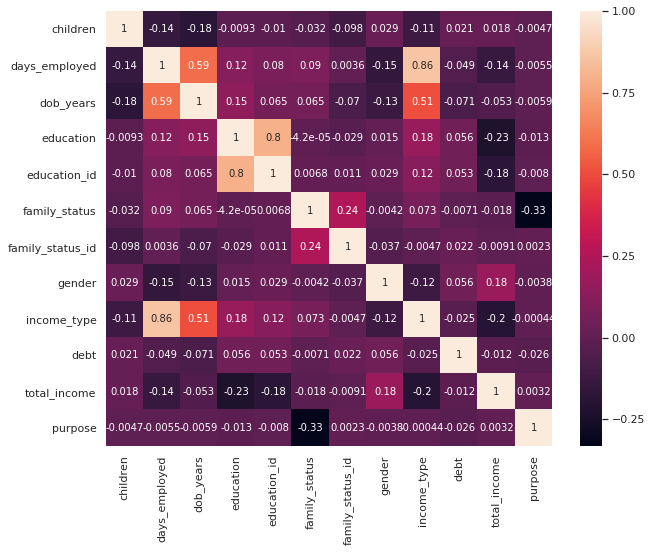

In [521]:
# correlation matrix 
from IPython.core.pylabtools import figsize
figsize(10, 8)

corrMatrix = credit_score_df_encode.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

(0, 1.050090358943059)

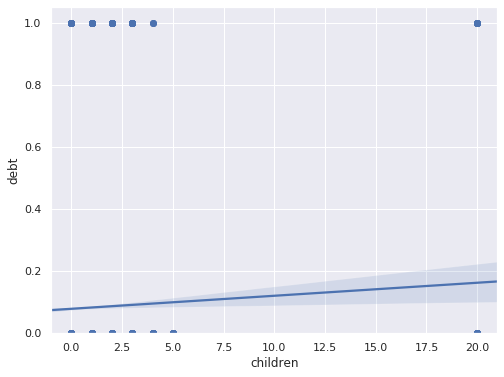

In [524]:
# having kids as a potential predictor of repaying a loan on time
figsize(8, 6)
sns.regplot(x='children', y='debt', data=credit_score_df_encode)
plt.ylim(0,)

First we start to analyze the data by creating a correlation matrix. Our correlation matrix does show that the linear relationship isn't extremely strong (~0.021) across the dataset. Ofcourse, we need to understand that **correlation does not imply causation** thus we need to look for another way to extract insight from the data. One such way is by using a pivot table and plotting the characteristics of the table.

In [587]:
# generate pivot table
loan_table = pd.pivot_table(credit_score_df, index = ['children', 'family_status'],
                            values = 'debt',
                            aggfunc = ['sum', len, 'mean']
                           )
loan_table

sum   len      mean
                           debt  debt      debt
children family_status                         
0        civil partnership  202  2468  0.081848
         divorced            49   717  0.068340
         married            462  6768  0.068262
         unmarried          192  2038  0.094210
         widow / widower     48   762  0.062992
1        civil partnership  102   897  0.113712
         divorced            19   280  0.067857
         married            230  2683  0.085725
         unmarried           51   407  0.125307
         widow / widower      6    76  0.078947
2        civil partnership   26   305  0.085246
         divorced             6    74  0.081081
         married            135  1389  0.097192
         unmarried            8    66  0.121212
         widow / widower      2    17  0.117647
3        civil partnership    6    45  0.133333
         divorced             1    10  0.100000
         married             14   226  0.061947
         unmarried            1     7  0.142857
         widow / widower      0     6  0.000000
4        civil partnership    0     7  0.000000
         divorced             0     1  0.000000
         married              2    24  0.083333
         unmarried            1     1  1.000000
         widow / widower      0     1  0.000000
5        civil partnership    0     1  0.000000
         married              0     7  0.000000
20       civil partnership    3    11  0.272727
         divorced             1     1  1.000000
         married              3    46  0.065217
         unmarried            1     6  0.166667
         widow / widower      0     3  0.000000

Text(0, 0.5, 'debt')

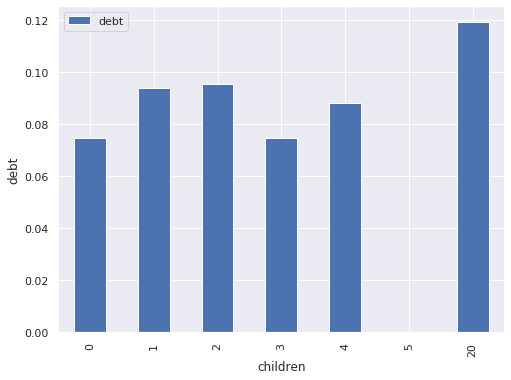

In [589]:
# plot of debt vs number of children
sns.set()
pd.pivot_table(credit_score_df, index = 'children', values = 'debt').plot(kind= 'bar')
plt.ylabel('debt')

Overall, we can see that people with more kids tends to have more debt. Statistically speaking, people with more than 5 kids and up to 20 kids are ~37% more likely to be in debt than people with no kid. This is a reasonable figure when you consider the fact that having more kid means you end up with more responsibility. We can continue to dissect the data to generate more insight by looking at `debt` vs `number of children` with `family status` consideration.

In [ ]:
# plot of debt vs number of children with family status consideration
sns.set()
pd.pivot_table(credit_score_df, index = 'children', columns= 'family_status', values = 'debt').plot(kind= 'bar')
plt.ylabel('debt')

From the plot above, we can observe that unmarried people with up to 4 kids and divorced people with up to 20 kids are ~75% more likely to be in debt than any other family status, and about 80% more likely to be in debt than people with 3 or less number of children.

In [582]:
# query table to extract more insight
loan_table.query('children == 0')

sum   len      mean
                           debt  debt      debt
children family_status                         
0        civil partnership  202  2468  0.081848
         divorced            49   717  0.068340
         married            462  6768  0.068262
         unmarried          192  2038  0.094210
         widow / widower     48   762  0.062992

In [583]:
# query table to extract more insight
loan_table.query('children == 20')

sum  len      mean
                           debt debt      debt
children family_status                        
20       civil partnership    3   11  0.272727
         divorced             1    1  1.000000
         married              3   46  0.065217
         unmarried            1    6  0.166667
         widow / widower      0    3  0.000000

### Conclusion

From our result above, the data tells us that people with more than 5 kids in general tend to be in more debt than people with less kids. People with more than 5 kids and up to 20 kids are ~37% more likely to be in debt than people with no kid thus, there is a relationship between having kids and repaying a loan on time. 

- Is there a relation between marital status and repaying a loan on time?

We start by looking at the correlation matrix. We see a weak correlation between `family_status` and repaying a `loan` on time across the data. We can slice the data by using pivot table to generate more insight.

(0, 1.050090358943059)

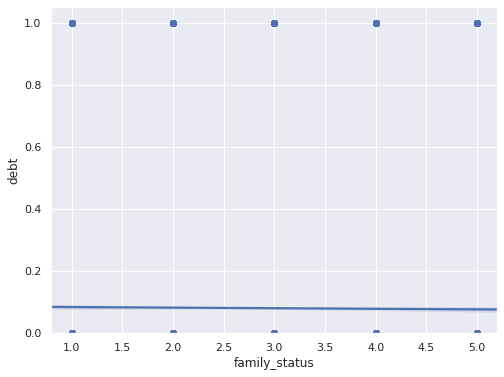

In [525]:
# marital status as a potential predictor of repaying a loan on time
figsize(8, 6)
sns.regplot(x='family_status', y='debt', data=credit_score_df_encode)
plt.ylim(0,)

In [597]:
# generate pivot table
pd.pivot_table(credit_score_df, index = ['family_status'],
                            values = 'debt',
                            aggfunc = ['sum', len, 'mean']
                           )

,sum,len,mean
,debt,debt,debt
family_status,,,
civil partnership,339,3734,0.090787
divorced,76,1083,0.070175
married,846,11143,0.075922
unmarried,254,2525,0.100594
widow / widower,56,865,0.064740


Text(0, 0.5, 'debt')

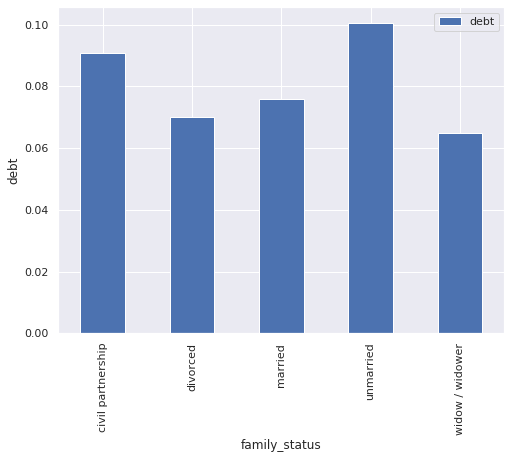

In [594]:
# plot of family status vs debt
sns.set()
pd.pivot_table(credit_score_df, index = 'family_status', values = 'debt').plot(kind= 'bar')
plt.ylabel('debt')

From the plot above, unmarried people are more than 2% likely to be in debt than married people. Widow/widower are least likely to be in debt than any of the other groups.

In [599]:
# pivot table with family_status, debt and education
loan_table1 = pd.pivot_table(credit_score_df, 
                             index = ['family_status', 'education'], 
                             values= 'debt', 
                             aggfunc = [len, 'mean']
                            )
loan_table1

len      mean
                                       debt      debt
family_status     education                          
civil partnership bachelor's degree     854  0.055035
                  primary education      50  0.180000
                  secondary education  2679  0.100411
                  some college          151  0.092715
divorced          bachelor's degree     292  0.047945
                  graduate degree         1  0.000000
                  primary education      20  0.100000
                  secondary education   744  0.077957
                  some college           26  0.076923
married           bachelor's degree    2740  0.051825
                  graduate degree         4  0.000000
                  primary education     131  0.106870
                  secondary education  7957  0.083072
                  some college          311  0.093248
unmarried         bachelor's degree     706  0.060907
                  graduate degree         1  0.000000
                  primary education      32  0.093750
                  secondary education  1613  0.117793
                  some college          173  0.104046
widow / widower   bachelor's degree     124  0.048387
                  primary education      28  0.000000
                  secondary education   700  0.068571
                  some college           13  0.153846

Text(0, 0.5, 'debt')

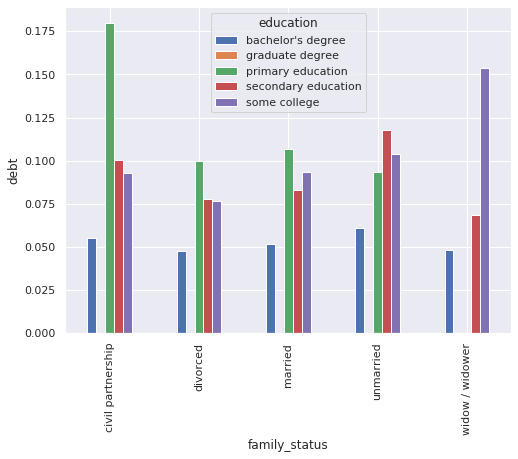

In [600]:
# plot of debt vs family status with education level consideration
sns.set()
pd.pivot_table(credit_score_df, index = 'family_status', columns= 'education', values = 'debt').plot(kind= 'bar')
plt.ylabel('debt')

We can see that when we consider family status across education levels, the data tells us that people with graduate degrees are less likely to be in debt than any other group. Widow/widowers with some college degree are more likely to be in debt than any other level of family status with same degree level. Civil partnership with primary education are more than likely to be in debt than any other level of family status with same degree level.

### Conclusion

In conclusion, unmarried people are more than 2% likely to be in debt than married people. Widow/widower are least likely to be in debt than any of the other groups. 

- Is there a relation between income level and repaying a loan on time?

(0, 1.0537281900289057)

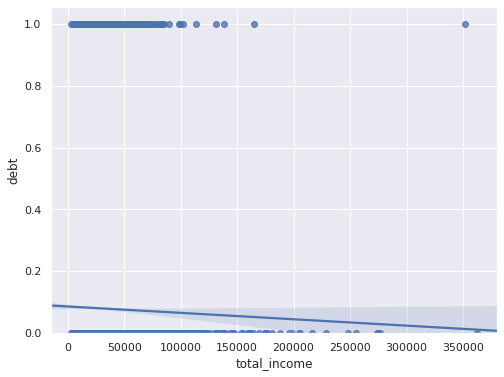

In [526]:
# total income as a potential predictor of repaying a loan on time
figsize(8, 6)
sns.regplot(x='total_income', y='debt', data=credit_score_df_encode)
plt.ylim(0,)

In [ ]:
# plot of total income vs debt
sns.set()
pd.pivot_table(credit_score_df, index = 'total_income', values = 'debt').plot(kind= 'bar')
plt.ylabel('debt')

In [ ]:
# pivot table with total_income vs debt
loan_table2 = pd.pivot_table(credit_score_df, 
                             index = ['total_income'], 
                             values= 'debt', 
                             aggfunc = ['sum']
                            )
loan_table2

### Conclusion

- How do different loan purposes affect on-time repayment of the loan?

(0, 1.050090358943059)

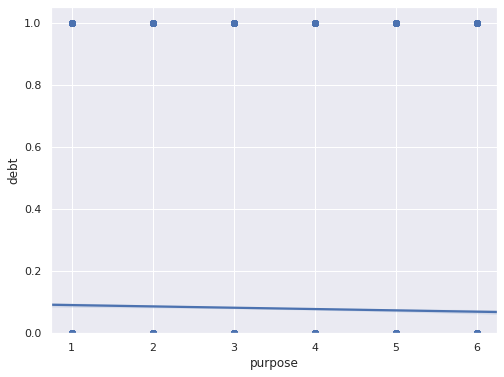

In [527]:
# loan purpose as a potential predictor of repaying a loan on time
figsize(8, 6)
sns.regplot(x='purpose', y='debt', data=credit_score_df_encode)
plt.ylim(0,)

In [539]:
pd.pivot_table(credit_score_df, index = ['purpose'])

,children,days_employed,debt,dob_years,education_id,family_status_id,total_income
purpose,,,,,,,
car purchase,0.547344,68927.162176,0.094175,43.465230,0.821914,0.977675,26771.863485
education,0.542118,68308.709480,0.092021,43.355852,0.833194,0.961079,26310.595218
house purchase,0.543661,64517.912388,0.068755,43.057441,0.808239,0.977372,27282.716565
property,0.551512,64837.736081,0.075844,42.933363,0.814993,0.951776,26645.213941
real estate,0.522959,66961.589724,0.075701,43.372797,0.822288,0.969720,27018.844378
wedding,0.534064,66918.987613,0.075274,43.151977,0.805145,1.000000,26524.367794


### Conclusion

<div id="general_conclusion">
    <h2>General conclusion</h2> 
</div>

<div id="project_readiness_checklist">
    <h2>Project Readiness Checklist</h2> 
</div>

Put 'x' in the completed points. Then press Shift + Enter.

- [x]  file open;
- [ ]  file examined;
- [ ]  missing values defined;
- [ ]  missing values are filled;
- [ ]  an explanation of which missing value types were detected;
- [ ]  explanation for the possible causes of missing values;
- [ ]  an explanation of how the blanks are filled;
- [ ]  replaced the real data type with an integer;
- [ ]  an explanation of which method is used to change the data type and why;
- [ ]  duplicates deleted;
- [ ]  an explanation of which method is used to find and remove duplicates;
- [ ]  description of the possible reasons for the appearance of duplicates in the data;
- [ ]  data is categorized;
- [ ]  an explanation of the principle of data categorization;
- [ ]  an answer to the question "Is there a relation between having kids and repaying a loan on time?";
- [ ]  an answer to the question " Is there a relation between marital status and repaying a loan on time?";
- [ ]   an answer to the question " Is there a relation between income level and repaying a loan on time?";
- [ ]  an answer to the question " How do different loan purposes affect on-time repayment of the loan?"
- [ ]  conclusions are present on each stage;
- [ ]  a general conclusion is made.